In [1]:
import torch
import torch.nn as nn
import numpy as np
import sys; sys.path.append('../src/')
import os
from model.cmpnts import MLP
from dataset.images import ImageToyDataset, generate_synthetic_dataset
import matplotlib.pyplot as plt
import torchvision as tv

In [2]:
data_dir = '../data/synthetic/'

In [3]:
img = tv.io.read_image('./misc/tri.png')
img = torch.cat([img, torch.zeros_like(img), torch.zeros_like(img)])

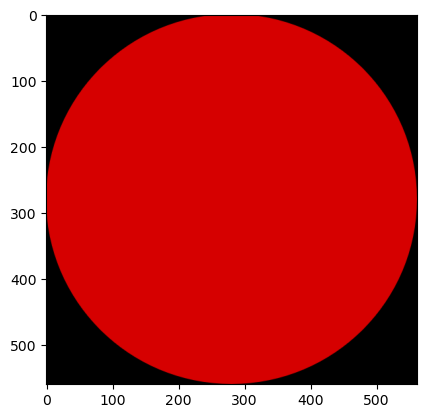

In [4]:
plt.imshow(img.permute(1,2,0))

In [5]:
import torchvision.transforms as tt
tf = nn.Sequential(
            tt.RandomAffine(degrees=0, translate=(0.2, 0.2), scale=(0.2, 0.5)), # 3
            tt.ColorJitter(hue=(0, 0.5), brightness=(0.3, 1)), # 2
            tt.Resize(32)
        )

/scratch/qchen/.conda/envs/toilet/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


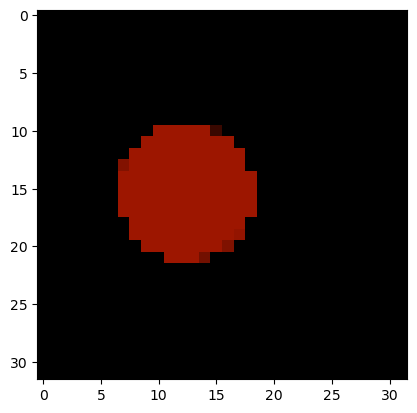

In [6]:
plt.imshow(tf(img).permute(1,2,0))

In [7]:
dataset = generate_synthetic_dataset('tri.png', 6000)

100%|██████████| 6000/6000 [03:07<00:00, 31.95it/s]


In [8]:
dataset.max() / 255

tensor(0.8353)

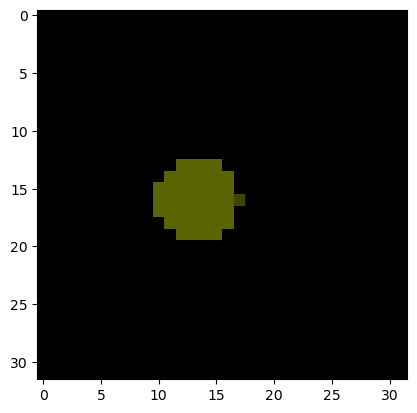

In [11]:
plt.imshow(dataset[2].permute(1,2,0))

In [12]:
# np.save(data_dir + 'images_30k', dataset.detach().numpy() / 255)
np.save(data_dir + 'images_6k', dataset.detach().numpy() / 255)